In [70]:
import pandas as pd

from data_pipeline.extractor import get_all_data

In [71]:
df = get_all_data(leagues=["cblol"])

In [72]:
df = df[df["year"] == 2024]
df = df[~(df["position"] == "team")]

In [73]:
player_data: dict[str, tuple[float, float]] = {}
for index, row in df.iterrows():
    if row["playername"] not in player_data:
        player_data[row["playername"]] = row["damagetochampions"], row["gamelength"]
    else:
        player_data[row["playername"]] = (
            player_data[row["playername"]][0] + row["damagetochampions"],
            player_data[row["playername"]][1] + row["gamelength"],
        )


player_to_dpm: dict[str, float] = {}

for player, (damage, time) in player_data.items():
    player_to_dpm[player] = damage / (time / 60)

player_to_dpm_sorted = {
    k: v
    for k, v in sorted(player_to_dpm.items(), key=lambda item: item[1], reverse=True)
}

In [74]:
top_10 = list(player_to_dpm_sorted.items())[:10]
print(top_10)

[('tinowns', 754.2608579714009), ('Hauz', 753.9432705276495), ('Brance', 732.422034212314), ('Route', 730.2516582780574), ('TitaN', 720.158154615318), ('toucouille', 698.0728948470884), ('NinjaKiwi', 692.2437147525432), ('Aithusa', 681.583302587888), ('dyNquedo', 673.7542539631468), ('SMILEY', 667.8752084491384)]


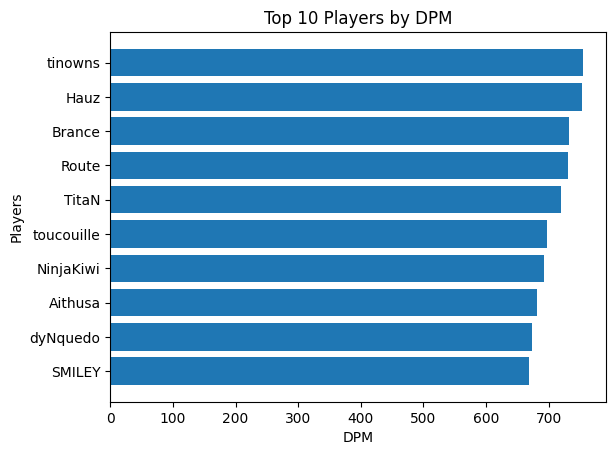

In [75]:
import matplotlib.pyplot as plt


players = [item[0] for item in top_10]
dpm_values = [item[1] for item in top_10]

plt.barh(players, dpm_values)
plt.xlabel("DPM")
plt.ylabel("Players")
plt.title("Top 10 Players by DPM")
plt.gca().invert_yaxis()

plt.show()

In [76]:
for player_name, dpm in top_10:
    dpm_fixed = round(dpm, 2)
    print(f"{player_name}: {dpm_fixed}")

tinowns: 754.26
Hauz: 753.94
Brance: 732.42
Route: 730.25
TitaN: 720.16
toucouille: 698.07
NinjaKiwi: 692.24
Aithusa: 681.58
dyNquedo: 673.75
SMILEY: 667.88
